In [1]:
# Dependencies
import tweepy
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import style
style.use("ggplot")
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Import Vader Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Target the News Accounts
target = ("@realDonaldTrump","@HillaryClinton","@BarakObama","@MittRomney")

# Variables for DataFrame
account = []
text = []
date = []
tweets_ago = []

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Tweet Counter
counter = 1

# Loop through each user
for user in target:
    
    # Tweet counter per target
    tweet_count = 0

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1,6):
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page = x)
        
        # Loop through all tweets
        for tweet in public_tweets:
            
            # Add to target Tweet count
            tweet_count += 1
            
            # Print Tweets
            print(f"Tweet {counter}: {tweet['text']}")
            
            # Run Vader Analysis
            results = analyzer.polarity_scores(tweet["text"])
            compound = results ["compound"]
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]
            
             # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            account.append(user)
            text.append(tweet['text'])
            date.append(tweet['created_at'])
            tweets_ago.append(tweet_count)      
            
            
            # Add to counter
            counter += 1

Tweet 1: The NFL National Anthem Debate is alive and well again - can’t believe it! Isn’t it in contract that players must s… https://t.co/mQ58CY5j7o
Tweet 2: RT @IvankaTrump: .@WhiteHouse National Council for the American Worker together w/ the private sector is working to equip students + worker…
Tweet 3: I got severely criticized by the Fake News Media for being too nice to President Putin. In the Old Days they would… https://t.co/d6Y1pRP4qD
Tweet 4: RT @realDonaldTrump: I told you so! The European Union just slapped a Five Billion Dollar fine on one of our great companies, Google. They…
Tweet 5: RT @realDonaldTrump: The Summit with Russia was a great success, except with the real enemy of the people, the Fake News Media. I look forw…
Tweet 6: RT @realDonaldTrump: Will the Dems and Fake News ever learn? This is classic! https://t.co/kSX3ROI4QG
Tweet 7: So important. Should have been done years ago! https://t.co/TFIqsaZWBt
Tweet 8: RT @Scavino45: “More Winning: American Jobless Claim

Tweet 81: RT @realDonaldTrump: “Trump has been the most consequential president in history when it comes to minority employment. In June, for instanc…
Tweet 82: 🇺🇸🇬🇧 https://t.co/CwnBfe3smd
Tweet 83: Joint Press Conference with Prime Minister Theresa May...
https://t.co/XQLkayYKlM
Tweet 84: RT @MagaGoldHat: @RonDeSantisFL event July 18 th in Orlando with @DonaldJTrumpJr https://t.co/C5B5UwQZXa
Tweet 85: Congressman Matt Gaetz of Florida is one of the finest and most talented people in Congress. Strong on Crime, the B… https://t.co/TrLe4PkBJZ
Tweet 86: Great success today at NATO! Billions of additional dollars paid by members since my election. Great spirit!
Tweet 87: A very nice note from Chairman Kim of North Korea. Great progress being made! https://t.co/6NI6AqL0xt
Tweet 88: “Trump has been the most consequential president in history when it comes to minority employment. In June, for inst… https://t.co/ZkM22tKnSD
Tweet 89: RT @dougmillsnyt: .@realDonaldTrump &amp; @FLOTUS walk off A

Tweet 161: The GOP wants to break their bipartisan pledge &amp; cut funding for the Children’s Health Insurance Program to pay for… https://t.co/WOKinkvbXY
Tweet 162: So exciting! https://t.co/9iJu9S3F4O
Tweet 163: It will also be harder to deal with other threats like ballistic missiles and terrorism. Now we have no leverage an… https://t.co/yaNu6pZwcw
Tweet 164: As Secretary of State, I helped negotiate the crippling international sanctions that brought Iran to the table. It… https://t.co/2h7l9OPEcG
Tweet 165: Pulling out of the Iran nuclear deal is a big mistake. It makes America less safe and less trusted. Iran is now mor… https://t.co/8BXRNdKjmf
Tweet 166: Great piece about a great guy I’ve known for a long time.
https://t.co/ITFYYmtvjI
Tweet 167: I’ve known @TomDangora and @AnastasiaSomoza for years &amp; they bring compassion &amp; creativity to everything they do. T… https://t.co/xxw2BtK0Nc
Tweet 168: Thank you @CecileRichards for your extraordinary leadership over the last 12 

Tweet 233: RT @Romney4Utah: HAPPENING FRIDAY: A conversation with Mitt &amp; Ann about how principled leadership has guided them through challenging times…
Tweet 234: Prayers for the First Lady and for Harry Reid.  Hoping for healing and recovery for both.
Tweet 235: Robert Jeffress says “you can’t be saved by being a Jew,“ and “Mormonism is a heresy from the pit of hell.”  He’s s… https://t.co/wwylmlryQN
Tweet 236: Ann and I reflect daily on the lessons our mothers, Lois and Lenore, taught us about life, faith, and family. Today… https://t.co/Meno7umxt6
Tweet 237: John McCain makes America great. Father, grandfather, Navy pilot, POW hero bound by honor, an incomparable and irre… https://t.co/U5Qdw78Mtn
Tweet 238: My statement on the Iran Nuclear Deal. https://t.co/ypqBpaHp6H
Tweet 239: RT @Romney4Utah: MUST LISTEN: @MittRomney's first interview on Saturday's convention results and his plan for the US Senate GOP Primary in…
Tweet 240: Thank you to all the delegates who hung in there wi

Tweet 293: Well done, Mike. And abject shame on Harvard. https://t.co/SfI1HxDpdD
Tweet 294: Harvey's historic devastation has been met with historic Texas compassion and resolve. A true testament to American character.
Tweet 295: Having created a natl inflection point of consequence, POTUS must apologize &amp; repudiate the racists. Full statement: https://t.co/6QXd9LWIE3
Tweet 296: No, not the same. One side is racist, bigoted, Nazi. The other opposes racism and bigotry. Morally different universes.
Tweet 297: Racial prejudice, then hate, then repugnant speech, then a repulsive rally, then murder; not supremacy, barbarism.
Tweet 298: .@SenJohnMcCain’s patriotism and courage are vital to the nation. With the fearful news tonight, Ann and I pray for his recovery.
Tweet 299: Spoke this morning with @SenJohnMcCain re: his health, tax reform, Syria. A true "Timex hero”: He takes a licking and keeps on ticking.
Tweet 300: Celebrating independent speech, worship, and association; independenc

In [3]:
# Convert sentiments to a DataFrame
df = pd.DataFrame({ "Account":account,
                           "Tweet":text,
                            "Date":date,
                            "Compound Score":compound_list,
                            "Positive Score": positive_list,
                            "Neutral Score": neutral_list,
                            "Negative Score":negative_list,
                            "Tweets Ago": tweets_ago})

In [4]:
# Rearrange columns of DataFrame 
df = df[["Account","Date","Tweet","Compound Score","Positive Score","Negative Score","Neutral Score", "Tweets Ago"]]

df

,Account,Date,Tweet,Compound Score,Positive Score,Negative Score,Neutral Score,Tweets Ago
0,@realDonaldTrump,Fri Jul 20 22:17:21 +0000 2018,The NFL National Anthem Debate is alive and we...,0.6114,0.200,0.000,0.800,1
1,@realDonaldTrump,Fri Jul 20 21:51:11 +0000 2018,RT @IvankaTrump: .@WhiteHouse National Council...,0.0000,0.000,0.000,1.000,2
2,@realDonaldTrump,Fri Jul 20 21:50:30 +0000 2018,I got severely criticized by the Fake News Med...,-0.7003,0.095,0.293,0.612,3
3,@realDonaldTrump,Fri Jul 20 14:39:21 +0000 2018,RT @realDonaldTrump: I told you so! The Europe...,0.7345,0.236,0.000,0.764,4
4,@realDonaldTrump,Fri Jul 20 14:39:02 +0000 2018,RT @realDonaldTrump: The Summit with Russia wa...,0.2960,0.234,0.198,0.569,5
5,@realDonaldTrump,Fri Jul 20 14:35:59 +0000 2018,RT @realDonaldTrump: Will the Dems and Fake Ne...,-0.5255,0.000,0.207,0.793,6
6,@realDonaldTrump,Fri Jul 20 14:35:49 +0000 2018,So important. Should have been done years ago!...,0.3367,0.230,0.000,0.770,7
7,@realDonaldTrump,Fri Jul 20 14:34:44 +0000 2018,RT @Scavino45: “More Winning: American Jobless...,-0.0772,0.178,0.246,0.576,8
8,@realDonaldTrump,Fri Jul 20 14:34:11 +0000 2018,RT @Scavino45: “Former Harvard law students pr...,0.5574,0.265,0.000,0.735,9
9,@realDonaldTrump,Fri Jul 20 14:33:57 +0000 2018,RT @Scavino45: “Senate GOP breaks record on co...,0.0000,0.000,0.000,1.000,10


In [5]:
# Subset DataFrame by each Media Source 
trump = df.loc[df["Account"] == "@realDonaldTrump"]
clinton = df.loc[df["Account"] == "@HillaryClinton"]
obama = df.loc[df["Account"] == "@BarakObama"]
romney = df.loc[df["Account"] == "@MittRomney"]

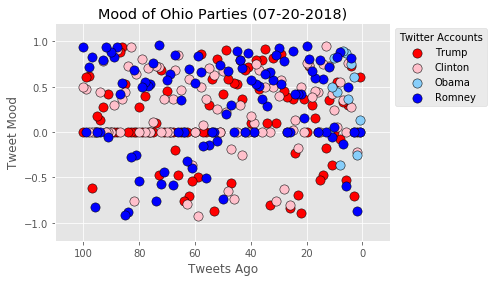

In [10]:
# Create scatter plots
plt.scatter(trump['Tweets Ago'], trump['Compound Score'], c='red',edgecolor='black', s=85, alpha=1, label='Trump')
plt.scatter(clinton['Tweets Ago'], clinton['Compound Score'], c='pink',edgecolor='black', s=85, alpha=1, label='Clinton')
plt.scatter(obama['Tweets Ago'], obama['Compound Score'], c='lightskyblue',edgecolor='black', s=85, alpha=1, label='Obama')
plt.scatter(romney['Tweets Ago'], romney['Compound Score'], c='blue',edgecolor='black', s=85, alpha=1, label='Romney')



# Incorporate other Plot features
now = datetime.now()
now = now.strftime("%m-%d-%Y")

plt.title(f"Mood of Ohio Parties ({now})") 
plt.xlabel("Tweets Ago")
plt.xlim(110,-10)
plt.ylabel("Tweet Mood")
plt.ylim(-1.2,1.2)
plt.legend(bbox_to_anchor=(1, 1), title='Twitter Accounts')
plt.grid(True)



plt.show()

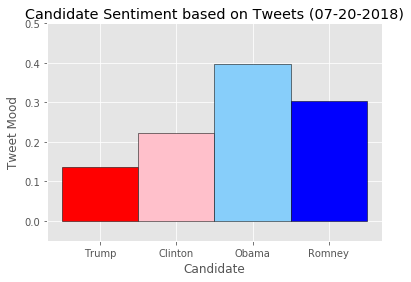

In [14]:
# Create a bar chart
plt.bar(0, trump['Compound Score'].mean(), edgecolor = 'black', color='red', width=1)
plt.bar(1, clinton['Compound Score'].mean(), edgecolor = 'black', color='pink', width=1)
plt.bar(2, obama['Compound Score'].mean(), edgecolor = 'black', color='lightskyblue', width=1)
plt.bar(3, romney['Compound Score'].mean(), edgecolor = 'black', color='blue', width=1)



# Incorporate other plot features
plt.title(f"Candidate Sentiment based on Tweets ({now})")
plt.ylim(-0.05, 0.50)
plt.xlabel("Candidate")
plt.ylabel("Tweet Mood")
x_labels = ["Trump", "Clinton", "Obama", "Romney"]
x_locations = [value for value in np.arange(4)]
plt.xticks(x_locations, x_labels)
 

#Adds a horizontal line at zero
plt.grid(True)

# Save file to Output folder
plt.savefig("Charts/Candidate Sentiment based on Tweets.png")

plt.show()